In [114]:
from montecarlo import *
from portfolio import *
import math

# montecarlo e ef
PERIODS = 252
dur = 20
riskFreeRate = 0.01
numPortfolios = 25

# randomwalk
NUM_YEARS = 10
NUM_MC_RUNS = 1000


%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# data = pd.read_csv('quotes_clean_mach1.csv')  # daily quotes assets_all
#data = pd.read_csv('quote_mach2.csv')  # daily quotes assets_all
#data['dateTime'] = pd.to_datetime(data['dateTime'])
#data.set_index('dateTime', inplace=True)
assets_all = ['imeu','ceu','smea','iusa','csspx','phau','ibtm','ibgm', 'emg', 'em15', 'ibgl']
assets = ['em15', 'ibtm', 'iusa', 'smea', 'phau'] # **
assets = ['imeu','cspxj','ieem','inaa','xmjp','xgle','phau']
assets = ['iusa','imeu','ibtm','xgle','phau']
assets = ['imeu','cspxj','ieem','inaa','xmjp','xgle','phau']
assets = ['xgle', 'ibtm', 'iusa', 'smea', 'ieem']
assets = ['em15', 'ibtm', 'iusa', 'smea', 'phau']

data = read_quotes(assets)

# correzione SMEA
if 'smea' in assets:
    x1 = data.smea.idxmin()
    data.smea.loc[x1] = data.smea.loc[x1 - pd.Timedelta(days=1)]

norm_data = data/data.iloc[0]
norm_data.plot()
# data.head()

## Montecarlo e Efficient Frontier

In [64]:
## MONTECARLO e Efficient Frontier
## portafoglio maxSharpe e minVar

results, meanDailyReturns, covMatrix = do_mc_simulation(data, assets, numPortfolios, PERIODS, riskFreeRate)

# Find efficient frontier
targetReturns = np.linspace(0.02, 0.12, 20)
efficientPortfolios = findEfficientFrontier(meanDailyReturns, 
                                            covMatrix, targetReturns, PERIODS)

# Find portfolio with maximum Sharpe ratio
maxSharpe = findMaxSharpeRatioPortfolio(meanDailyReturns, covMatrix,
                                        riskFreeRate, PERIODS)
retms, sdms = calcPortfolioPerf(maxSharpe['x'], meanDailyReturns, covMatrix, PERIODS)

# Find portfolio with minimum variance
minVar = findMinVariancePortfolio(meanDailyReturns, covMatrix, PERIODS)
retmv, sdmv = calcPortfolioPerf(minVar['x'], meanDailyReturns, covMatrix, PERIODS) 
    

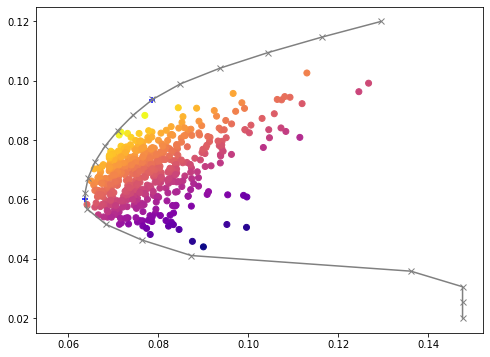

In [72]:
### PLOTTING

dfResults = results.copy()
dfResults = dfResults[['ret','vola','sharpe']]

fig10 = plt.figure(figsize = (8,6))
plt.scatter(dfResults.vola, dfResults.ret, c = dfResults.sharpe, marker = 'o', cmap='plasma')
plt.scatter(sdms, retms, c='blue', marker='+')
plt.scatter(sdmv, retmv, c='blue', marker='+')
plt.plot([p['fun'] for p in efficientPortfolios], targetReturns, marker='x', c='gray')

plt.show()



In [98]:
# Informazioni sul ptfolio migliore
# maxSharpe _fra_ i portafogli generati random

results.sharpe = pd.to_numeric(results.sharpe)
results.iloc[results.sharpe.idxmax()]

ret       0.0883222
vola      0.0770726
sharpe      1.01621
em15       0.477469
ibtm      0.0128034
iusa       0.338234
smea       0.115699
phau      0.0557943
Name: 405, dtype: object

## Montecarlo su tutte le combinazioni di portafogli

In [178]:
# combinazioni degli asset a gruppi

from itertools import combinations 
  
def combine(arr, s): 
    return list(combinations(arr, s)) 

array = assets_all
set = 5
all_portfolio_combinations = combine(array, set)

all_results = pd.DataFrame(columns=['ret','vola','sharpe']+assets_all)

for num, asset_list in enumerate(all_portfolio_combinations):
    assets = list(asset_list)
    d = read_quotes(assets)
    # correzione SMEA
    if 'smea' in assets:
        x1 = d.smea.idxmin()
        d.smea.loc[x1] = d.smea.loc[x1 - pd.Timedelta(days=1)]
    
    results, meanDailyReturns, covMatrix = do_mc_simulation(d, assets, numPortfolios, PERIODS, riskFreeRate)

    results.sharpe = pd.to_numeric(results.sharpe)
    res = results.iloc[results.sharpe.idxmax()]
    
    print(asset_list, "{0:4.3f} {1:4.3f} {2:4.3f}".format(res.ret, res.vola, res.sharpe))
    #print(res)
    all_results = all_results.append(res)

('imeu', 'ceu', 'smea', 'iusa', 'csspx') 0.117 0.145 0.736
('imeu', 'ceu', 'smea', 'iusa', 'phau') 0.080 0.108 0.646
('imeu', 'ceu', 'smea', 'iusa', 'ibtm') 0.079 0.101 0.680
('imeu', 'ceu', 'smea', 'iusa', 'ibgm') 0.089 0.127 0.619
('imeu', 'ceu', 'smea', 'iusa', 'emg') 0.071 0.077 0.798
('imeu', 'ceu', 'smea', 'iusa', 'em15') 0.086 0.107 0.705
('imeu', 'ceu', 'smea', 'iusa', 'ibgl') 0.067 0.084 0.684
('imeu', 'ceu', 'smea', 'csspx', 'phau') 0.087 0.121 0.638
('imeu', 'ceu', 'smea', 'csspx', 'ibtm') 0.084 0.109 0.679
('imeu', 'ceu', 'smea', 'csspx', 'ibgm') 0.071 0.085 0.711
('imeu', 'ceu', 'smea', 'csspx', 'emg') 0.074 0.097 0.664
('imeu', 'ceu', 'smea', 'csspx', 'em15') 0.088 0.096 0.817
('imeu', 'ceu', 'smea', 'csspx', 'ibgl') 0.084 0.097 0.756
('imeu', 'ceu', 'smea', 'phau', 'ibtm') 0.051 0.080 0.519
('imeu', 'ceu', 'smea', 'phau', 'ibgm') 0.053 0.081 0.535
('imeu', 'ceu', 'smea', 'phau', 'emg') 0.044 0.063 0.538
('imeu', 'ceu', 'smea', 'phau', 'em15') 0.066 0.071 0.787
('imeu', '

('imeu', 'iusa', 'csspx', 'phau', 'ibgm') 0.086 0.089 0.848
('imeu', 'iusa', 'csspx', 'phau', 'emg') 0.091 0.100 0.813
('imeu', 'iusa', 'csspx', 'phau', 'em15') 0.085 0.089 0.844
('imeu', 'iusa', 'csspx', 'phau', 'ibgl') 0.090 0.092 0.864
('imeu', 'iusa', 'csspx', 'ibtm', 'ibgm') 0.082 0.092 0.785
('imeu', 'iusa', 'csspx', 'ibtm', 'emg') 0.096 0.108 0.796
('imeu', 'iusa', 'csspx', 'ibtm', 'em15') 0.092 0.082 1.001
('imeu', 'iusa', 'csspx', 'ibtm', 'ibgl') 0.081 0.083 0.850
('imeu', 'iusa', 'csspx', 'ibgm', 'emg') 0.078 0.072 0.937
('imeu', 'iusa', 'csspx', 'ibgm', 'em15') 0.081 0.066 1.069
('imeu', 'iusa', 'csspx', 'ibgm', 'ibgl') 0.088 0.087 0.892
('imeu', 'iusa', 'csspx', 'emg', 'em15') 0.077 0.063 1.063
('imeu', 'iusa', 'csspx', 'emg', 'ibgl') 0.094 0.094 0.898
('imeu', 'iusa', 'csspx', 'em15', 'ibgl') 0.077 0.073 0.911
('imeu', 'iusa', 'phau', 'ibtm', 'ibgm') 0.057 0.082 0.574
('imeu', 'iusa', 'phau', 'ibtm', 'emg') 0.064 0.081 0.661
('imeu', 'iusa', 'phau', 'ibtm', 'em15') 0.065 0

('ceu', 'iusa', 'phau', 'ibtm', 'ibgm') 0.068 0.074 0.783
('ceu', 'iusa', 'phau', 'ibtm', 'emg') 0.064 0.063 0.854
('ceu', 'iusa', 'phau', 'ibtm', 'em15') 0.079 0.073 0.943
('ceu', 'iusa', 'phau', 'ibtm', 'ibgl') 0.071 0.078 0.788
('ceu', 'iusa', 'phau', 'ibgm', 'emg') 0.068 0.066 0.890
('ceu', 'iusa', 'phau', 'ibgm', 'em15') 0.066 0.059 0.939
('ceu', 'iusa', 'phau', 'ibgm', 'ibgl') 0.079 0.079 0.883
('ceu', 'iusa', 'phau', 'emg', 'em15') 0.069 0.058 1.006
('ceu', 'iusa', 'phau', 'emg', 'ibgl') 0.064 0.060 0.906
('ceu', 'iusa', 'phau', 'em15', 'ibgl') 0.074 0.070 0.908
('ceu', 'iusa', 'ibtm', 'ibgm', 'emg') 0.051 0.045 0.898
('ceu', 'iusa', 'ibtm', 'ibgm', 'em15') 0.072 0.063 0.986
('ceu', 'iusa', 'ibtm', 'ibgm', 'ibgl') 0.072 0.072 0.860
('ceu', 'iusa', 'ibtm', 'emg', 'em15') 0.072 0.061 1.017
('ceu', 'iusa', 'ibtm', 'emg', 'ibgl') 0.072 0.072 0.865
('ceu', 'iusa', 'ibtm', 'em15', 'ibgl') 0.075 0.068 0.947
('ceu', 'iusa', 'ibgm', 'emg', 'em15') 0.073 0.060 1.040
('ceu', 'iusa', 'ibgm'

('iusa', 'csspx', 'ibtm', 'em15', 'ibgl') 0.084 0.075 0.982
('iusa', 'csspx', 'ibgm', 'emg', 'em15') 0.080 0.064 1.095
('iusa', 'csspx', 'ibgm', 'emg', 'ibgl') 0.062 0.052 1.006
('iusa', 'csspx', 'ibgm', 'em15', 'ibgl') 0.088 0.074 1.046
('iusa', 'csspx', 'emg', 'em15', 'ibgl') 0.081 0.069 1.026
('iusa', 'phau', 'ibtm', 'ibgm', 'emg') 0.043 0.041 0.791
('iusa', 'phau', 'ibtm', 'ibgm', 'em15') 0.059 0.064 0.762
('iusa', 'phau', 'ibtm', 'ibgm', 'ibgl') 0.051 0.062 0.659
('iusa', 'phau', 'ibtm', 'emg', 'em15') 0.062 0.066 0.778
('iusa', 'phau', 'ibtm', 'emg', 'ibgl') 0.050 0.054 0.736
('iusa', 'phau', 'ibtm', 'em15', 'ibgl') 0.063 0.073 0.734
('iusa', 'phau', 'ibgm', 'emg', 'em15') 0.055 0.052 0.856
('iusa', 'phau', 'ibgm', 'emg', 'ibgl') 0.049 0.052 0.757
('iusa', 'phau', 'ibgm', 'em15', 'ibgl') 0.060 0.067 0.748
('iusa', 'phau', 'emg', 'em15', 'ibgl') 0.059 0.061 0.790
('iusa', 'ibtm', 'ibgm', 'emg', 'em15') 0.048 0.048 0.798
('iusa', 'ibtm', 'ibgm', 'emg', 'ibgl') 0.040 0.051 0.597
('i

In [179]:
all_results.to_csv('portfolio_combinations_mc_results.csv')

## Random Walk

In [ ]:
# da runnare solo una volta, altrimenti rovina norm_data
pndata = norm_data.copy()

weights = minVar['x']
pndata['minvar'] = norm_data.mul(weights,axis=1).sum(axis=1)

weights = maxSharpe['x']
pndata['maxSharpe'] = norm_data.mul(weights,axis=1).sum(axis=1)

# pndata.head()

In [ ]:
pct_ret = pndata.pct_change()
pct_ret.dropna(inplace=True)
#pct_ret.head()

In [ ]:
mc_runs, ann_mc_returns, vol_mc_returns, sharpe_mc_runs = do_mc_randomwalk(pct_ret, 
                                                                           NUM_MC_RUNS, NUM_YEARS, 
                                                                           riskFreeRate, PERIODS)

In [ ]:
#plt.scatter(vol_mc_returns, ann_mc_returns, c = sharpe_mc_runs,marker = 'o')
#plt.colorbar(label = 'Sharpe Ratio')

In [ ]:
mc_stats = pd.DataFrame()
for i in [0,500,1000,1500,2000,mc_runs.shape[0]-1]:
    mc_stats[i] = mc_runs.iloc[i,:].describe([.1,.25,.5,.75,.9])

In [ ]:
# mc_stats

In [ ]:
plt.plot([0,500,1000,1500,2000,2521],mc_stats.loc['10%'], marker='o')
plt.plot([0,500,1000,1500,2000,2521],mc_stats.loc['90%'], marker='o')
plt.plot([0,500,1000,1500,2000,2521],mc_stats.loc['50%'], marker='o')
plt.plot([0,500,1000,1500,2000,2521],mc_stats.loc['25%'], marker='o')
plt.plot([0,500,1000,1500,2000,2521],mc_stats.loc['75%'], marker='o')
plt.plot([0,500,1000,1500,2000,2521],mc_stats.loc['min'], marker='o')
plt.plot([0,500,1000,1500,2000,2521],mc_stats.loc['max'], marker='o')
plt.show()

In [ ]:
# Statistiche solo sul risultato finale

mc_end_results = mc_runs.iloc[2520]

plt.hist(mc_end_results, bins=35)
plt.axvline(mc_end_results.quantile(0.05), color='r', linestyle='dashed', linewidth=2)
plt.axvline(mc_end_results.quantile(0.5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(mc_end_results.quantile(0.95), color='r', linestyle='dashed', linewidth=2)
plt.show()